# Polynomial Regression Homework

## Tasks

* Generate dataset
* Split into train-test
* Implement Polynomial Regression Class 
* Implement all functions which we used in the lecture
* Search good hyperparameters for n_degree and lambda

### Generate Dataset

* Generate noise sin dataset
* Split into train test


In [75]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math 
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [76]:
SEED = 43
X_MIN = 0
X_MAX = 200
N = 200
MEAN = 0
STD = 1
np.random.seed(SEED)
X = np.linspace(X_MIN, X_MAX, N)
Y_line = np.sin(X)
Y = Y_line + np.random.normal(MEAN,STD,N)
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=58)

### Implement Polynomial Regression

In [77]:
class PolynomialRegression:
    """Polynomial Regression with regularization(ridge)"""

    def __init__(self, n_degree=2, lambda_=None):
        """
        Init method takes n_degree and lambda_ params
        :param n_degree: (int) degree of polynomial
        :param lambda_: (float or None) None if you don't want to use regularization
        """
        self.n_degree = n_degree
        self.lambda_ = lambda_
        self.betta = None


    def fit(self, X, Y):
        """
        Main fit method.
        Need to take X, transform to polynomial features, and fit linear regression(use regularization if lambda_ not None)
        Fitted bettas assign to self.bettas
        :param X: (np.array) features
        :param Y: (np.array) target
        :return: None
        """
        poly_features = PolynomialFeatures(degree=self.n_degree).fit_transform(X)
        if(self.lambda_ == None):
            self.betta =  np.matmul(np.linalg.inv(np.matmul(np.transpose(poly_features),poly_features)),np.matmul(np.transpose(poly_features),Y))
        else:
            self.betta =  np.matmul(np.linalg.inv(np.matmul(np.transpose(poly_features),poly_features) + self.lambda_*np.eye(Y.shape[1])),np.matmul(np.transpose(poly_features),Y))



    def predict(self, X):
        """
        Predict method.
        Takes X transform to polynomial features, and make predictions 
        :param X:(np.array) features
        :return:Y_pred(np.array) predictions
        
        """
        poly_features = PolynomialFeatures(degree=self.n_degree).fit_transform(X)
        Y_pred = poly_features @ self.betta
        return Y_pred



    def coeff(self):
        """
        Returns fitted model coefficients(bettas)
        :return: bettas(np.array)
        """
        return self.betta
    
    def loss(self,X,Y):
        loss = ((self.predict(X)-Y)**2).sum()/(len(X)*2)
        return loss


In [78]:
poly_reg = PolynomialRegression(n_degree=2,lambda_= None)
poly_reg.fit(X_train,y_train)


### Implement all functions which we used in the lecture

In [79]:
def plot_polinomial_regression(X_train, Y_train, X_test, Y_test, n_degree=2, lambda_=None):
    """
    Need to plot train, test points and fitted line(1D case only), and print train, test loss(MSE)

    :param X_train: (np.array)
    :param Y_train: (np.array)
    :param X_test: (np.array)
    :param Y_test: (np.array)
    :param n_degree: (int)
    :param lambda_: (float or None) None if you don't want to use regularization
    :return: None 
    """
    poly_reg = PolynomialRegression(n_degree = n_degree,lambda_= lambda_)
    poly_reg.fit(X_train,Y_train)
    fig = plt.figure(figsize=(12,8))
    plt.scatter(X_train,Y_train)
    plt.scatter(X_test,Y_test)
    plt.plot(sorted(X_train),poly_reg.predict(sorted(X_train)),"r")
    plt.legend(['Regression Plot','Train Set','Test Set'])
    if(lambda_ == None):
        loss_train = poly_reg.loss(X_train,Y_train)
        loss_test = poly_reg.loss(X_test,Y_test)

    else:
        loss_train = poly_reg.loss(X_train,Y_train) + (lambda_/2)*np.linalg.norm(poly_reg.coeff())
        loss_test = poly_reg.loss(X_test,Y_test) + (lambda_/2)*np.linalg.norm(poly_reg.coeff())
    print("Train Loss: ",loss_train)
    print("Test Loss: ",loss_test)



def plot_degree_vs_loss(X_train, Y_train, X_test, Y_test, range_=10, lambda_=None):
    """
    Need to iterate over over polynomial degrees fit and plot train loss vs test loss
    :param X_train: (np.array)
    :param Y_train: (np.array)
    :param X_test: (np.array)
    :param Y_test: (np.array)
    :param n_degree: (int)
    :param lambda_: (float or None) None if you don't want to use regularization
    :return: None
    """
    loss_train = []
    loss_test = []
    for i in range(range_):  
        poly_reg = PolynomialRegression(n_degree=i,lambda_ = lambda_)
        poly_reg.fit(X_train,y_train)
        if(lambda_ == None):
            loss_tr = poly_reg.loss(X_train,Y_train)
            loss_te = poly_reg.loss(X_test,Y_test)
            loss_train.append(loss_tr)
            loss_test.append(loss_te)

        else:
            loss_tr = poly_reg.loss(X_train,Y_train) + (lambda_/2)*np.linalg.norm(poly_reg.coeff())
            loss_te = poly_reg.loss(X_test,Y_test) + (lambda_/2)*np.linalg.norm(poly_reg.coeff())
            loss_train.append(loss_tr)
            loss_test.append(loss_te)
    fig = plt.figure(figsize=(12,8))
    plt.plot(range(range_),loss_train)
    plt.plot(range(range_),loss_test,'r')
    plt.xlabel('Degree')
    plt.ylabel('Loss')
    plt.legend(['DegreeVSLoss on Train Set','DegreeVSLoss on Test Set'])


def plot_lambda_vs_loss(X_train, Y_train, X_test, Y_test, degree, lambda_range=[0,2]):
    """
    Need to iterate over over polynomial degrees fit and plot train loss vs test loss
    :param X_train: (np.array)
    :param Y_train: (np.array)
    :param X_test: (np.array)
    :param Y_test: (np.array)
    :param n_degree: (int)
    :param lambda_range: (float or None) Searching space for lambda 
    :return: None
    """
    loss_train = []
    loss_test = []
    for i in lambda_range:  
        poly_reg = PolynomialRegression(n_degree=degree,lambda_ = i)
        poly_reg.fit(X_train,y_train)
        loss_tr = poly_reg.loss(X_train,Y_train) + (i/2)*np.linalg.norm(poly_reg.coeff())
        loss_te = poly_reg.loss(X_test,Y_test) + (i/2)*np.linalg.norm(poly_reg.coeff())
        loss_train.append(loss_tr)
        loss_test.append(loss_te)
    fig = plt.figure(figsize=(12,8))
    plt.plot(lambda_range,loss_train)
    plt.plot(lambda_range,loss_test,'r')
    plt.xlabel('Lambda')
    plt.ylabel('Loss')
    plt.legend(['LambdaVSLoss on Train Set','LambdaVSLoss on Test Set'])

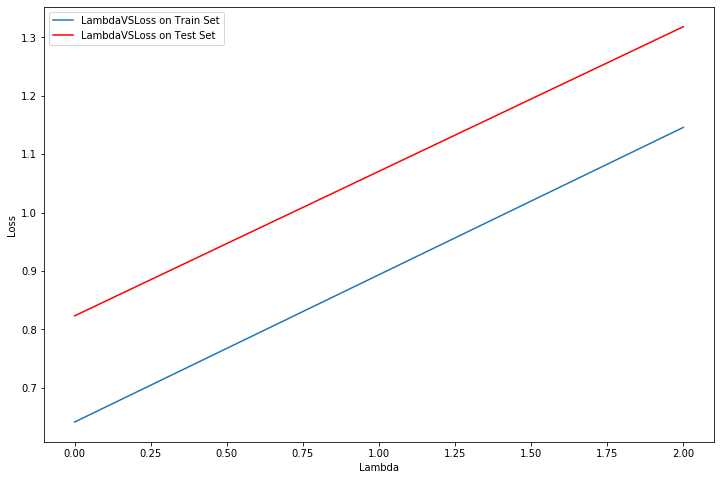

In [80]:
plot_lambda_vs_loss(X_train=X_train, Y_train = y_train, X_test=X_test, Y_test=y_test, degree= 15, lambda_range=[0,2])


Train Loss:  0.7941817490549231
Test Loss:  0.9316540785160825


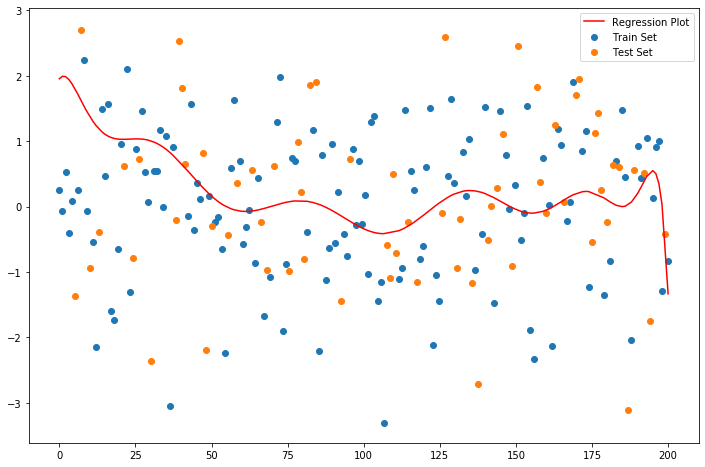

In [81]:
plot_polinomial_regression(X_train=X_train, Y_train = y_train, X_test=X_test, Y_test=y_test, n_degree= 15, lambda_ = 0.03)


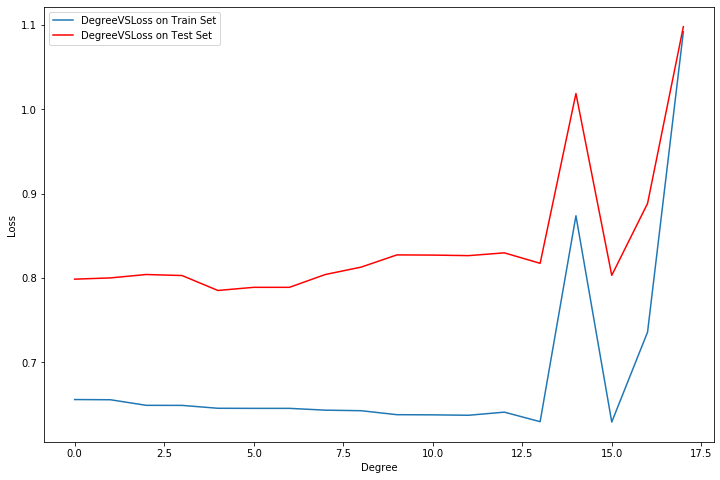

In [82]:
plot_degree_vs_loss(X_train=X_train, Y_train = y_train, X_test=X_test, Y_test=y_test, range_= 18, lambda_ = 0.0000000000001)


### Search good hyperparameters for n_degree and lambda
### Use your implemented functions

## I have generated 200 points in the range of 0:200.  With the constructed functions above it can be seen that around 16 degree, Loss in our polynomial increases. Assume we would take maximum 16 degree to get best fit for out test set. After checking several lambda-s I have figured out that best loss around 0.8 will be with labda equal to 0.03.